In [18]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

class FaceDetection:
    def __init__(self):
        self.face_detector = mp.solutions.face_detection.FaceDetection()

    def detect_face(self, frame):
        results = self.face_detector.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        if results.detections:
            # Get the first detected face
            detection = results.detections[0]
            bboxC = detection.location_data.relative_bounding_box
        
            h, w, _ = frame.shape
            x = max(0, bboxC.xmin * w)  # Ensure x is not negative
            y = max(0, bboxC.ymin * h)  # Ensure y is not negative
            width = min(w - x, bboxC.width * w)  # Ensure width does not exceed image bounds
            height = min(h - y, bboxC.height * h)  # Ensure height does not exceed image bounds

            print("x, y, width, height", x, y, width, height)
            # Crop the face region from the original frame
            face_image = frame[int(y):int(y + height), int(x):int(x + width)]
            return face_image  # Return the cropped face image
        print("No face detected")
        return None  # Return None if no face is detected

x, y, width, height 0 74.37773829698563 177.11435425281525 177.10106152296066
(177, 177, 3)
[[[155 155 173]
  [143 143 161]
  [126 127 147]
  ...
  [ 35  41  52]
  [ 22  26  37]
  [ 33  34  44]]

 [[153 153 171]
  [139 140 160]
  [123 126 147]
  ...
  [ 44  50  61]
  [ 39  43  54]
  [ 36  37  47]]

 [[150 149 169]
  [137 138 158]
  [121 124 145]
  ...
  [ 41  47  58]
  [ 43  47  58]
  [ 40  41  51]]

 ...

 [[232 233 237]
  [232 233 237]
  [232 233 237]
  ...
  [ 62  70 107]
  [ 62  71 105]
  [ 58  69 101]]

 [[232 233 237]
  [232 233 237]
  [232 233 237]
  ...
  [ 62  70 107]
  [ 62  71 105]
  [ 58  69 101]]

 [[232 233 237]
  [232 233 237]
  [232 233 237]
  ...
  [ 62  70 107]
  [ 62  71 105]
  [ 59  70 102]]]


I0000 00:00:1736989741.096307   75787 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1736989741.099477   87267 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


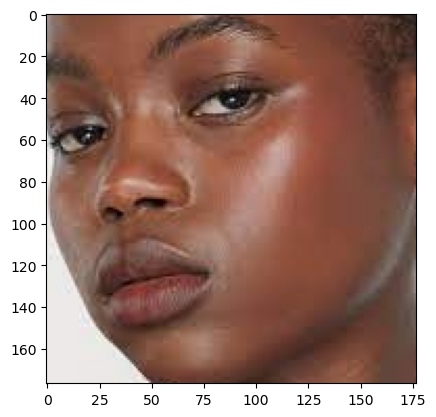

In [22]:

face_detector = FaceDetection()
frame = cv2.imread("/Users/ahmedalkhulayfi/Downloads/images.jpeg")
face = face_detector.detect_face(frame)
print(face.shape)
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
print(face)

In [1]:
import cv2
import mediapipe as mp
import time

class FaceDetector:
    def __init__(self, min_detection_confidence=0.5):
        self.mp_face_detection = mp.solutions.face_detection
        self.mp_draw = mp.solutions.drawing_utils
        self.face_detection = self.mp_face_detection.FaceDetection(
            min_detection_confidence=min_detection_confidence
        )

    def detect_faces(self, image, draw=True):
        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Process the image
        results = self.face_detection.process(image_rgb)
        
        bboxes = []
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, ic = image.shape
                bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                       int(bboxC.width * iw), int(bboxC.height * ih)
                bboxes.append(bbox)
                
                if draw:
                    # Draw bounding box
                    cv2.rectangle(image, bbox, (0, 255, 0), 2)
                    # Draw confidence score
                    cv2.putText(image, f'{int(detection.score[0]*100)}%',
                              (bbox[0], bbox[1]-20), cv2.FONT_HERSHEY_PLAIN,
                              2, (0, 255, 0), 2)
        
        return image, bboxes

def main():
    # Initialize video capture
    cap = cv2.VideoCapture(0)
    detector = FaceDetector()
    
    # FPS calculation variables
    pTime = 0
    cTime = 0
    
    while True:
        success, img = cap.read()
        img, bboxes = detector.detect_faces(img)
        
        # Calculate and display FPS
        cTime = time.time()
        fps = 1 / (cTime - pTime)
        pTime = cTime
        cv2.putText(img, f'FPS: {int(fps)}', (20, 70), 
                    cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 2)
        
        cv2.imshow("Image", img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

2025-01-19 17:54:30.920 python[8130:348294] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1737298472.486382  348294 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1737298472.498951  348649 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


| Model | Speed (FPS) | Accuracy | GPU Required | Ease of Use | Best Use Case |
|-------|-------------|----------|--------------|-------------|---------------|
| MediaPipe | 30+ | Good | No | Very Easy | Real-time applications |
| SCRFD | 25+ | Excellent | Yes | Medium | High-accuracy needs |
| RetinaFace | 20+ | Very Good | Recommended | Medium | Multiple face detection |
| YOLOv8-Face | 25+ | Very Good | Recommended | Medium | General purpose |
| BlazeFace | 35+ | Good | No | Easy | Mobile/edge devices |
| CenterFace | 25+ | Good | No | Medium | Basic face detection |
| MTCNN | 10-15 | Good | No | Easy | When accuracy > speed |
| FaceBoxes | 30+ | Fair | No | Easy | Basic/simple cases |